In [131]:
import importlib

import myutils
importlib.reload(myutils)
import myutils as myutils
import evaluation
importlib.reload(evaluation)

import mypytable
importlib.reload(mypytable)
from mypytable import MyPyTable 

import myclassifiers
importlib.reload(myclassifiers)
from myclassifiers import MyNaiveBayesClassifier,\
    MyDummyClassifier,\
    MyRandomForestClassifier,\
    MyDecisionTreeClassifier

import numpy as np

import matplotlib.pyplot as plt

# Analyzing Health Risk Factors 
### Research Leaders: Sofia Verdie, Fiona Callahan 
##### **CPSC 322, Fall 2025**

### Introduction 

* In this research project, we decided to analyze specific risk factors in the health field. Our dataset, in the form of a csv file, was found on Kaggle with about 30,000 instances. Each instance represented a patient who had 20 attributes describing them. Some of the important attributes include age, gender, blood pressure, BMI index, family history and length of stay. Some attributes that did not have any meaning to us, so we decided not to work with them was random_notes, as well as noise_col. 
* The classification task that we decided to take on was to train our data on a subset of these attributes, and then, classify each patient if they ended up being "Healthy" or "Unhealthy". Within the realm of "Unhealthy" classification, were the labels of Diabetes, Hypertension, Asthma, Obesity, Cancer and Arthiritis. At the beginning of our research, we tried to complete multi-class classification, but ended up turning it to binary due to the severely low accuracy levels we were attaining. The final attributes we deicded to work on revolved around a lifestyle subset that included items such as Smoking, Physical Activity and Diet Score. 
* By implementing the classifiers, Naive Bayes, Decision Tree, Random Forest, we found that Decision Tree worked the best for our dataset. We found this by calculating its precision, accuracy, recall and placing the results into a confusion matrice. 
* We really enjoyed working on this project, so hope you enjoy

## Data Preprocessing 

**Our current dataset: full of 30,000 records**
* However, we will be pariing this down to 4,000 random samples during classification 
    * **Missing Values:**
        * 16,645 rows with missing attributes 
        * Glucose, blood pressure columns: replaced missing values with the column average 
        * Removed 11,556 rows that were missing the Gender label, Age label, as well as the classification label 
        * We will be pairing this down to 4,000 random samples during classification 
    * **Noisy Data:**
        * Everything was in correct format: correct capitalizaition and spelling 
    * **Invalid Data**    
        * Invalid placeholders: lorem, ipsum, ###, ???
        * Thse values were mostly in the columns, random_notes AND note_col

In [132]:
# load the data into file 
our_data = MyPyTable().load_from_file("input_data/healthData.csv")

length, width = our_data.get_shape()
print("Our original length:", length)
print("Our original width:", width)

# cleaning data: remove rows with missing values in the "Gender" column, as well as the CLass label column 
our_data.remove_rows_with_missing_values("Gender")
our_data.remove_rows_with_missing_values("Medical Condition")
our_data.remove_rows_with_missing_values("Age")
# add?
our_data.remove_rows_with_missing_values("Age")

# replacing other missing values with column avergae: need to do for other columns? 
our_data.replace_missing_values_with_column_average("Glucose")
our_data.replace_missing_values_with_column_average("Blood Pressure")
our_data.replace_missing_values_with_column_average("Cholesterol")

our_data.save_to_file("output_data/cleaned_data.csv")

length, width = our_data.get_shape()
print("Our post-cleaning- length:", length)
print("Our original width:", width)


Our original length: 30000
Our original width: 20
Our post-cleaning- length: 18444
Our original width: 20


## Exploratory Data Analysis

### Summary Stats

In [133]:
# summary stats
# need to add more 
summary_stats = our_data.compute_summary_statistics(["Age", "LengthOfStay", "Glucose", "Cholesterol", "Blood Pressure", "Physical Activity", "Diet Score", "Sleep Hours"])
summary_stats.pretty_print()

attribute            min     max      mid        avg    median
-----------------  -----  ------  -------  ---------  --------
Age                10      89      49.5     54.6841     55
LengthOfStay        1      19      10        4.4068      4
Glucose            20.32  318.51  169.415  123.49      116.5
Cholesterol        95.73  355.27  225.5    213.161     211.87
Blood Pressure     74.24  226.38  150.31   140.422     140.422
Physical Activity  -3.68   12.41    4.365    3.8211      3.6
Diet Score         -1.75   12.06    5.155    4.04213     3.79
Sleep Hours         1.59   10.35    5.97     6.23891     6.23


##### This tells us: 
* On average:   
    * This dataset is working with patients around the age of 50 years, but with a range from 10-89
    * The length of stay is usually around 4 days per pateint 
    * Our patients have a relatively low physical activity, diet score and sleep hours score 
        * This could correlate with the fact that there is  a very big difference between the amount of healthy vs unhealthy people 
* There is a huge range between the minimum and maximum cholesterol level, as well as the blood pressure level 
* Relatively not a lot of outliers from what we can see from our end due to the low differential between median and average for each category 
* This told us to focus in on Physical Activity, Diet Score, Sleep Hours, etc.. because of the range in what it was telling us and on average, it was all low: which could correlate with low health


### Making the Class Distribution Even: 

In [134]:
# reducing size of instances to 4000 for classification 
# also splitting up distribution, so there are 200 Healthy and 200 Unhealthy
healthy_index = []
unhealthy_index = []

for i in range(len(our_data.data)):
    if our_data.data[i][2] == "Healthy":
        healthy_index.append(our_data.data[i])
    else:
        unhealthy_index.append(our_data.data[i])

np.random.seed(0)
scaled_down_indexes = np.random.choice(len(unhealthy_index), size=2000, replace=False)
table = []
for i in range(len(unhealthy_index)):
    if i in scaled_down_indexes:
        table.append(unhealthy_index[i])

scaled_down_indexes_healthy = np.random.choice(len(healthy_index), size=2000, replace=False)
for i in range(len(healthy_index)):
    if i in scaled_down_indexes_healthy:
        table.append(healthy_index[i])


# data set is now full of 5000 instances [scaled down] - to classify onprint(len(table))

### Date Visualization - From 500 instances 

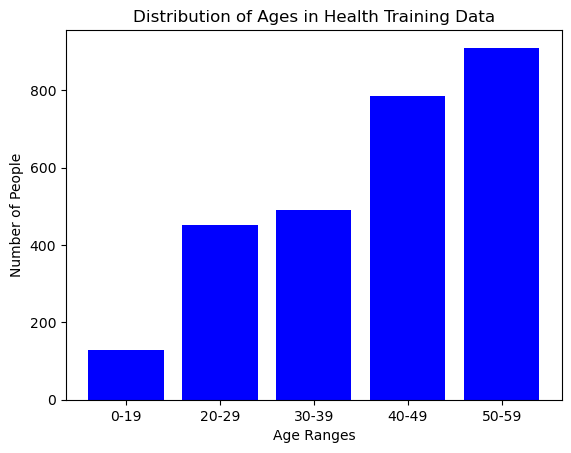

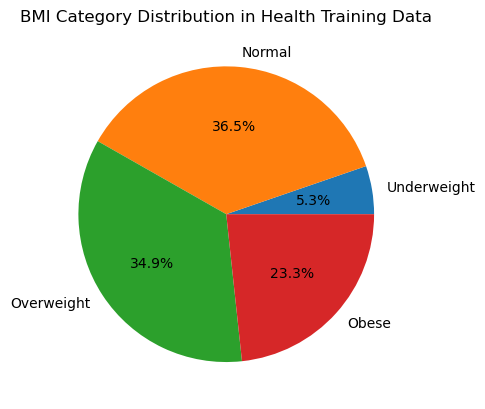

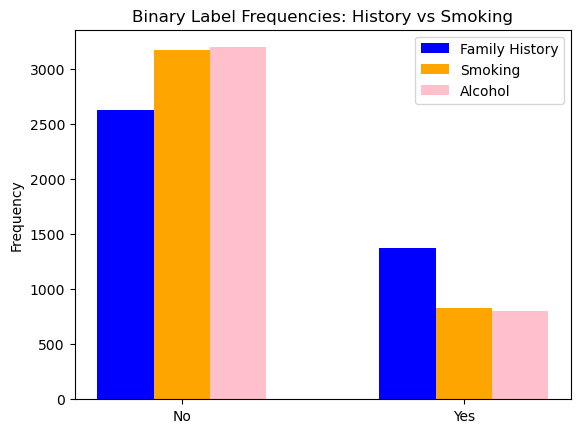

In [135]:
# bar graph: shows distribution of age
myutils.bar_graph(table)
# pie chart: percentages of the weight demographic of our dataset 
myutils.pie_graph(table)
# Histogram: shows the binary label frequences of smoking, alcohol, as well as family history
myutils.hist_graph(table)

* The graph that tells us the most from above is the last one. I found it very interesting because there are a decent amount of people without family history, smoking or alcohol in their record, so it made us think that these would not be related to health status, but from further investigation, it provided great means for classifying. 
* The pie chart tells us that there is a decent amount of people in our dataset who are overweight or obese, which makes sense, as there is a strong presence of "Unhealthy" people in our dataset

### Classification Results 

**CLASSIFIERS USED:**
* Dummy Classifer: As a baseline to build off of 
* Naive Bayes
* Decision Tree
* Random Forest [Built off of the decision tree]

**Classifier Label**
* Medical Condition: Healthy vs Unhealthy 
* Attributes:   
    * Smoking, Age, Physical Activity, Stress Level, Diet Score, Sleep Hours, Family History, Medical Condition 
    * **The lifestyle subset basically**

### Building the Classifier 

In [ ]:
# after much testing done outside of the notebook, these are the attributes we ended up classifying one 
keep = ["Smoking", "Alcohol", "Physical Activity", "Diet Score", "Stress Level", "Sleep Hours", "Family History", "Medical Condition"] 

keep_indexes = []
for i in keep:
    column_index = our_data.column_names.index(i)
    keep_indexes.append(column_index)

# make new data table of just the indexes we want 
# new structure: the keep list [use in future as header]
new_table = [[row[j] for j in keep_indexes] for row in table]


# from when we were testing what attributes to keep: 

#bmi_index = keep.index("BMI")
#bp_index = keep.index("Blood Pressure")
#glucose_index = keep.index("Glucose")
#for row in new_table:
    #row[bmi_index] = myutils.bin_bmi(float(row[bmi_index]))
    #row[bp_index]  = myutils.bin_bp(float(row[bp_index]))
    #row[glucose_index] = myutils.bin_glucose(float(row[glucose_index]))

for i in range(len(new_table)):
    if new_table[i][-1] != "Healthy":
        new_table[i][-1] = "Not Healthy"

    
# train/test split - built off the 2/3 method 
# making y_train and y_test 
y = myutils.make_y_col_lists(keep, "Medical Condition", new_table)
X = [row[:-1] for row in new_table]
X_train, X_test, y_train, y_test = evaluation.train_test_split(X, y)


# dummy classifier: 
dummy_clf = MyDummyClassifier()
dummy_clf.fit(X_train, y_train)
predictions = dummy_clf.predict(X_test)


# Decision Tree 
tree_clf = MyDecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)


# naive bayes:
naive_bayes = MyNaiveBayesClassifier()
naive_bayes.fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)


# now need to do random forest 
# X_train: remainder set (to further put down our instances)
remainder_train, remainder_test, remainder_y_train, remainder_y_test = evaluation.train_test_split(X_train, y_train)


random_forest1 = MyRandomForestClassifier(20,10,2,6,5) #used default arguments
random_forest1.fit(remainder_train, remainder_y_train)
predictions1 = random_forest1.predict(X_test)


### Predictions

In [137]:
# now time to predict: 
d_accuracy, d_error_rate, y_true_dummy, y_pred_dummy = myutils.cross_val_predict(X_train, y_train, dummy_clf)
print("Dummy Classifier: accuracy = ", d_accuracy, "error rate = ", d_error_rate)

n_accuracy, n_error_rate, n_true, n_pred = myutils.cross_val_predict(X_train, y_train, naive_bayes)
print("Naive Bayes Classifier: accuracy = ", n_accuracy, "error rate = ", n_error_rate)

t_accuracy, t_error_rate, t_true, t_pred = myutils.cross_val_predict(X_train, y_train, tree_clf)
print("Decision Tree Classifier: accuracy = ", t_accuracy, "error rate = ", t_error_rate)

r_accuracy1, r_error_rate1, r_true, r_pred1 = myutils.cross_val_predict(X_train, y_train, random_forest1)
print("Random Forest Classifier1: accuracy = ", r_accuracy1, "error rate = ", r_error_rate1)


Dummy Classifier: accuracy =  0.4824626865671642 error rate =  0.5175373134328358
Naive Bayes Classifier: accuracy =  0.5 error rate =  0.5
Decision Tree Classifier: accuracy =  0.7406716417910447 error rate =  0.2593283582089553
Random Forest Classifier1: accuracy =  0.6973880597014925 error rate =  0.30261194029850746


### A note on the random forest classifiers: 
* There were many trials to make sure that we chose the correct hyperparameters to plug into the classifier and these were some of the results: 

    * (N=10, F=5, M=4): ACCURACY -> .68
    * **(N=20, F=6, M=5): ACCURACY -> .69** Chose to use this one for the accuracy purposes 
    * (N=3, F=3, M=1): ACCURACY -> .64 (not very surprising because minimizes all of the parameters)
    * (N=6, F=7, M=3): ACCURACY -> .68

* This tree took the longest, in comparison, to compile becuase of the high N, but the best results, even if only by .1%
* I saw that higher the amount of trees curated, the better results were 

### Precision, Recall, F1 Results 

In [138]:
d_precision = evaluation.binary_precision_score(y_true_dummy, y_pred_dummy, labels=None, pos_label="Not Healthy")
d_recall =evaluation.binary_recall_score(y_true_dummy, y_pred_dummy, labels=None, pos_label="Not Healthy")
d_f1 = evaluation.binary_f1_score(y_true_dummy, y_pred_dummy, labels=None, pos_label="Not Healthy")
print("For Dummy Classifier: ")
print("precision: ", d_precision)
print("recall: ", d_recall)
print("F1 score: ", d_f1)
print("------------------------------------------------------------")
print("------------------------------------------------------------")


n_precision = evaluation.binary_precision_score(n_true, n_pred, labels=None, pos_label="Not Healthy")
n_recall =evaluation.binary_recall_score(n_true, n_pred, labels=None, pos_label="Not Healthy")
n_f1 = evaluation.binary_f1_score(n_true, n_pred, labels=None, pos_label="Not Healthy")
print("For Naive Bayes Classifier: ")
print("precision: ", n_precision)
print("recall: ", n_recall)
print("F1 score: ", n_f1)
print("------------------------------------------------------------")
print("------------------------------------------------------------")

t_precision = evaluation.binary_precision_score(t_true, t_pred, labels=None, pos_label="Not Healthy")
t_recall =evaluation.binary_recall_score(t_true, t_pred, labels=None, pos_label="Not Healthy")
t_f1 = evaluation.binary_f1_score(t_true, t_pred, labels=None, pos_label="Not Healthy")
print("For Decision Tree Classifier: ")
print("precision: ", t_precision)
print("recall: ", t_recall)
print("F1 score: ", t_f1)
print("------------------------------------------------------------")
print("------------------------------------------------------------")


r_precision = evaluation.binary_precision_score(r_true, r_pred, labels=None, pos_label="Not Healthy")
r_recall =evaluation.binary_recall_score(r_true, r_pred, labels=None, pos_label="Not Healthy")
r_f1 = evaluation.binary_f1_score(r_true, r_pred, labels=None, pos_label="Not Healthy")
print("For Random Forest Classifier: ")
print("precision: ", r_precision)
print("recall: ", r_recall)
print("F1 score: ", r_f1)

For Dummy Classifier: 
precision:  0.4458955223880597
recall:  0.17983446200150488
F1 score:  0.25630026809651474
------------------------------------------------------------
------------------------------------------------------------
For Naive Bayes Classifier: 
precision:  0.9292452830188679
recall:  0.31336161187698836
F1 score:  0.46867565424266455
------------------------------------------------------------
------------------------------------------------------------
For Decision Tree Classifier: 
precision:  0.8433628318584071
recall:  0.6478585995921142
F1 score:  0.73279507881584
------------------------------------------------------------
------------------------------------------------------------
For Random Forest Classifier: 
precision:  0.48450704225352115
recall:  0.32845321451304904
F1 score:  0.39150227617602434


### Confusion Matrices

In [139]:
from tabulate import tabulate 
labels = sorted(set(y_train))

matrix_dummy = evaluation.confusion_matrix(y_true_dummy, y_pred_dummy, labels)
matrix_naive = evaluation.confusion_matrix(n_true, n_pred, labels)
matrix_tree = evaluation.confusion_matrix(t_true, t_pred, labels)
matrix_forest = evaluation.confusion_matrix(r_true, r_pred, labels)

print("Dummy Classifier: (10 fold cross validation results)")
print(tabulate(matrix_dummy, headers=labels, showindex=labels, tablefmt="grid"))
print("------------------------------------------------------------")

print("Naive Bayes Classifier: (10 fold cross validation results)")
print(tabulate(matrix_naive, headers=labels, showindex=labels, tablefmt="grid"))
print("------------------------------------------------------------")

print("Decision Tree Classifier: (10 fold cross validation results)")
print(tabulate(matrix_tree, headers=labels, showindex=labels, tablefmt="grid"))
print("------------------------------------------------------------")

print("Random Forest Classifier: (10 fold cross validation results)")
print(tabulate(matrix_forest, headers=labels, showindex=labels, tablefmt="grid"))

Dummy Classifier: (10 fold cross validation results)
+-------------+-----------+---------------+
|             |   Healthy |   Not Healthy |
+=============+===========+===============+
| Healthy     |      1054 |           297 |
+-------------+-----------+---------------+
| Not Healthy |      1090 |           239 |
+-------------+-----------+---------------+
------------------------------------------------------------
Naive Bayes Classifier: (10 fold cross validation results)
+-------------+-----------+---------------+
|             |   Healthy |   Not Healthy |
+=============+===========+===============+
| Healthy     |       749 |           602 |
+-------------+-----------+---------------+
| Not Healthy |        37 |          1292 |
+-------------+-----------+---------------+
------------------------------------------------------------
Decision Tree Classifier: (10 fold cross validation results)
+-------------+-----------+---------------+
|             |   Healthy |   Not Healthy |
+

## THE WINNER: **DECISION TREE** 
* (queue **WE ARE THE CHAMPIONS!!**)


### Conclusion and Results 

**Classifier Method and Performance  - RESULTS**
* In this project, we developed 4 different classifiers to look at our health dataset. We decided to classify the Medical Condition attribute, where we classified each instance, "Healthy" or "Unhealthy". The hardest part of this whole process was choosing what attributes to select on, as well as putting together the RandomForest Classifier. For the RandomForestClassifier, it made use of the DecisionTreeClassifier class by making several trees, each with a different inputted dataset, and then testing each of these trees to find the highest performing ones. The top M trees were then used to make predictions. This classifier was the second highest performing out of the other two, Naive and Decision Tree. The Decision Tree ended up with the highest F1 score, overall, which we decided was the best unit of measurement for success. It also had the best accuracy, which can sometimes be skewed, but it improved the Dummy Classifer by about 30%. With this classifier, we made use of the TDIDT algorithm, where we built up trees and use these branches to clasify. For our Naive Bayes classifier, that used probabilities to predict certain instances, this did not perform as well as I thought it would. It worked super well at Precision, but only about 30% in recall, which is only 10% better than Dummy. It also had about the same accuracy with Dummy, which I thought was very surprising. Before we balanced classes, Naive Bayes was still one of the lowest performing classifiers, so we decided this should not be implemented in our field. 
* For our evaluation, we specifically used a Dummy classifier to act like a baseline for each of our algorithms. We predicted accuracy using 10-fold cross validation. Before this step was accomplished, we split the data using a 2/3 holdout method for train, test, split. Since accuracy does not always tell the full story, we also did precision, recall, f1 and finally, showed all of this more clearly in a confusion matrices. The preciison and recall provided means for how we could see our classifiers were working, but F1 seemed to tell the full story. 
* After looking at all of our results, we decided that our **Decision Tree Classifier**was the best due to its consistency in success throughout all of our measures. It did particularly well in recall and precision, which is difficult to do and is an indicator that it does well at predicting both classes. Our Random Forest was the second best, but something about the compiling of several trees must have thrown it off track. It could also be due to the fact that it trained on less instances due to the seperation of the Remainder and Original test. I would love to look into this in the future. 


**Challenges with the dataset**
* Starting off: Accuracy was very low 
    * Experimented with number of attributes 
    * Each of the 7 labels was very difficult to classify at first 
    * We put discretization to use, but it did not do much 
* Several attributes included in classification decrease accuracy exponentially 
* The values of certain attribute columns were not very clear, so more research was needed

**Improvements in Future**
* Choose different classification label: 
    * Options could include blood pressure, length of stay, or diet quality score 
* Improve accuracy
    * We could make subsets of features to specifically predict Diabetes, Hypertension, etc..

**Potential Impact**
* Why could our results be useful?
    * In the health science field, nurses perform similar functions, as this, to deicper what treatment to go forward with 
    * Our results could be useful, as well, in determining if this data set needs to be strengthened or not (EX: deleting some features)
    * More broadly, medical workers can use this information to help improve classification of medical conditions, thus improving the ability to reconize certain conditions in patients 


### Acknowledgements 

Content used in this research project can be acknowledged from the following sources
* [Ahmed387, AbdalluH.](www.kaggle.com/datasets/abdallaahmed77/healthcare-risk-factors-dataset/data.)“Healthcare Risk Factors Dataset.” Kaggle, 27 Sept. 2025
* [Ashwin Viswanathan Kannan](datascience.salon/feature-selection-in-machine-learning?gad_source=1&gad_campaignid=22114556059&gbraid=0AAAAA-Q8n0syzjRlpw-PPjskFoihArYAw&gclid=CjwKCAiAoNbIBhB5EiwAZFbYGJUFHzAZKD0uCvPFmfSJYZN_1D-_ulBynxjBVrLZRKleF4v036fLYRoCW1gQAvD_BwE), Ph.D. “Feature Selection in Machine Learning.” DSS Blog, 1 Aug. 2025, roundtable
* [“Diabetes and High Blood Pressure .”](www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-high-blood-pressure) John Hopkins Medicine
* “How to Implement Random Forest From Scratch .” AssemblyAI, [YouTube](www.youtube.com/watch?v=kFwe2ZZU7yw), 2022
* Previous PAS from Fiona Callahan: PA4, PA5, PA6
* Previous work from Ginza Sprint 222 Class [Final Project]

